In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

In [2]:
curr_dir = !pwd

hhalign_scores = pd.read_csv(curr_dir[0]+"/domains_hhlign_scores.csv", sep='\t', index_col=0)

### Check the scores distribution to determine a threshold for similarity

In [5]:
h = np.histogram(hhalign_scores["scores"])

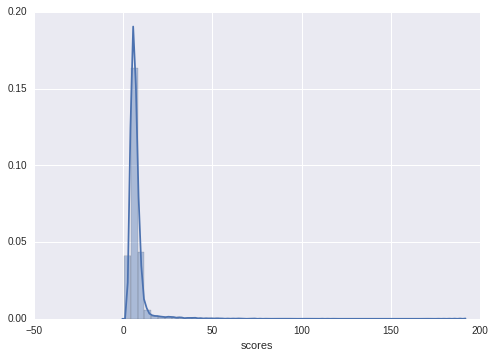

In [12]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.distplot(hhalign_scores["scores"]);

This distribution is only of similarity scores within clans, so they are already pretty high and not represnting similarity between two random domains.

In [33]:
hhalign_scores.columns

Index([u'index', u'sim_dom1', u'sim_dom2', u'scores', u'p-values'], dtype='object')

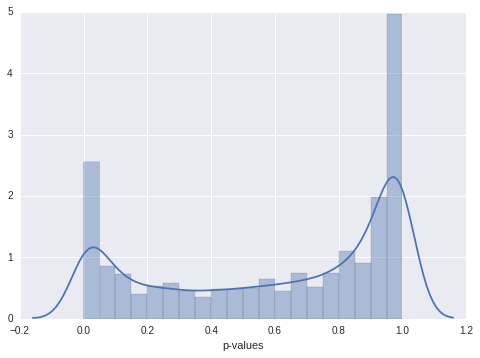

In [38]:
sns.distplot(hhalign_scores["p-values"]);

In [26]:
np.percentile(hhalign_scores["scores"], 99)

35.90550000000006

In [31]:
np.sum(hhalign_scores["scores"] >= 40)

162

In [41]:
np.percentile(hhalign_scores["p-values"], 10)

0.025000000000000001

0.001 p-value is the diffault threshold for Viterbi:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3197634/

In [50]:
np.sum(hhalign_scores["p-values"] <= 0.001)

2030

In [56]:
np.percentile(hhalign_scores[hhalign_scores["p-values"] <= 0.001]["scores"], 45)

10.029999999999999

HHalign Viterbi score >= 10 like the threshold used in: https://academic.oup.com/nar/article/45/W1/W470/3782606

In [74]:
significantly_similar_pairs = hhalign_scores[hhalign_scores["p-values"] <= 0.001][hhalign_scores["scores"] >= 10]
significantly_similar_pairs.reset_index(inplace=True, drop=True)

In [78]:
significantly_similar_pairs.to_csv("sig_pairs_pval0.001_score10.csv", sep='\t')

In [79]:
significantly_similar_pairs

,index,sim_dom1,sim_dom2,scores,p-values
0,331,Hydrolase_4,Abhydrolase_6,64.54,2.100000e-09
1,340,Hydrolase_4,Abhydrolase_1,106.22,2.800000e-16
2,506,Abhydrolase_6,Abhydrolase_1,62.74,5.500000e-10
3,577,S1,CSD,21.23,1.100000e-04
4,1001,Guanylate_kin,AAA_33,27.34,6.000000e-04
5,1026,Guanylate_kin,AAA_5,26.90,8.600000e-04
6,1039,Guanylate_kin,MMR_HSR1,27.41,4.800000e-04
7,1052,Guanylate_kin,AAA_18,27.28,3.100000e-04
8,1176,DEAD,Microtub_bd,27.49,7.700000e-04
9,1184,DEAD,SNF2_N,45.11,4.600000e-06
